In [9]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('titanictrain.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       886 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
df.drop(['PassengerId','SibSp','Parch','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,NaN
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S


In [14]:
df['Survived']=df['Survived'].map({
    0:'Died',
    1:'Survived'
})
df['Pclass']=df['Pclass'].map({
    3:'Lower',
    2:'Middle',
    1:'Upper'
})
df['Cabin']=df['Cabin'].fillna('XXX')
df['Embarked']=df['Embarked'].fillna('S')
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,Died,Lower,"Braund, Mr. Owen Harris",male,22.0,7.2500,XXX,S
1,Survived,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,Survived,Lower,"Heikkinen, Miss. Laina",female,26.0,7.9250,XXX,S
3,Survived,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,Died,Lower,"Allen, Mr. William Henry",male,35.0,8.0500,XXX,S


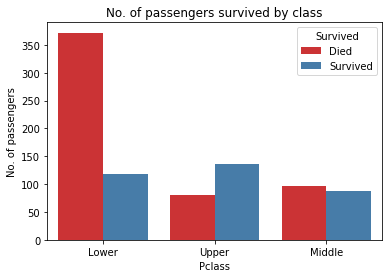

In [19]:
ax1=sb.countplot(x='Pclass',hue='Survived',data=df,palette="Set1")
ax1.set(title='No. of passengers survived by class',xlabel="Pclass",ylabel='No. of passengers')
plt.show()

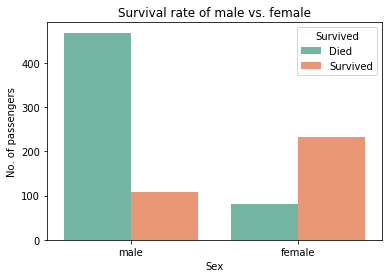

In [21]:
ax2=sb.countplot(x='Sex',hue='Survived',data=df,palette="Set2")
ax2.set(title='Survival rate of male vs. female',xlabel="Sex",ylabel='No. of passengers')
plt.show()

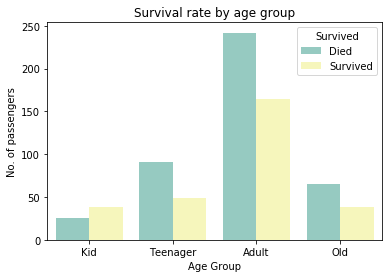

In [22]:
interval=(0,10,21,45,100)
categories=['Kid','Teenager','Adult','Old']
df['agecat']=pd.cut(df['Age'],interval,labels=categories)
ax3=sb.countplot(x='agecat',hue='Survived',data=df,palette="Set3")
ax3.set(title='Survival rate by age group',xlabel="Age Group",ylabel='No. of passengers')
plt.show()